<a href="https://colab.research.google.com/github/ZiyueLiu-zl3472/week6/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import yfinance as yf
import pandas as pd

pd.options.display.float_format = '{:.4f}'.format

def YahooData2returns(symbol,start="2020-01-01", end="2025-02-01"):
    prices = get_stock_data(symbol,start,end)
    returns = get_returns(prices.values)

    return(returns)

def get_stock_data(symbol,start="2020-01-01", end="2025-02-01"):
    print(symbol)
    data = yf.download(symbol, start, end)
    data = yf.download(symbol)
    prices = data['Close']
    return prices

# Example usage
prices = get_stock_data('GS')
print(type(prices))
pricevec = prices.values

def get_returns(pricevec):
    n = len(pricevec)
    ratiovec = pricevec[1:n] / pricevec[:n-1]
    returns = ratiovec - 1  # assuming the return calculation is (price_t / price_t-1) - 1
    return returns

# Example of using get_returns
returns = YahooData2returns('GS',start="2019-01-01", end="2025-02-01")
print(returns)

[*********************100%***********************]  1 of 1 completed

GS



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
GS


[*********************100%***********************]  1 of 1 completed

[[-0.01776156]
 [-0.01717845]
 [ 0.09107576]
 ...
 [ 0.00465108]
 [-0.01581496]
 [ 0.02857848]]


-4.200466413842135


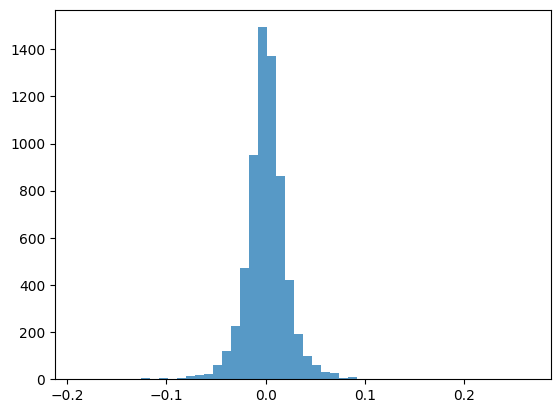

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def VaR(r, confidence=.95, principal = 1):
    out = np.percentile(r, (1 - confidence)*100)* principal
    # This function returns the left tail value and displays a histogram
    # r = a vector of stock returns
    # principal = investment initial value
    # <your work>
    # out = principal * positively stated value of r at the 1-alpha percentile
    return out

var=VaR(returns, 0.975, 100)

print(var)

plt.hist(returns, bins=50, alpha=0.75)
plt.show()

In [57]:
import numpy as np

# Part 3 - given a set of returns calculate the ES and allow for
# the notional amount to be an input variable "principal with" a default value of 1
# 2 points

def ES(losses, confidence=None, VaR=None, use_PnL=False, principal=1):

    if use_PnL:
        losses = np.where(losses < 0, -losses * principal, 0)

    if VaR is None:
        # If VaR is not provided, determine VaR based on the confidence percentile
        VaR = np.percentile(losses, 100 * confidence)

    es_value = np.mean(losses[losses > VaR])
    return es_value

es=ES(returns, 0.975, use_PnL=True, principal=100)

print(es)




6.366940967611944


[*********************100%***********************]  1 of 1 completed

GS



[*********************100%***********************]  1 of 1 completed

[[-0.01717853]
 [ 0.09107619]
 [-0.04637486]
 [-0.00088392]]
-4.200525247842308


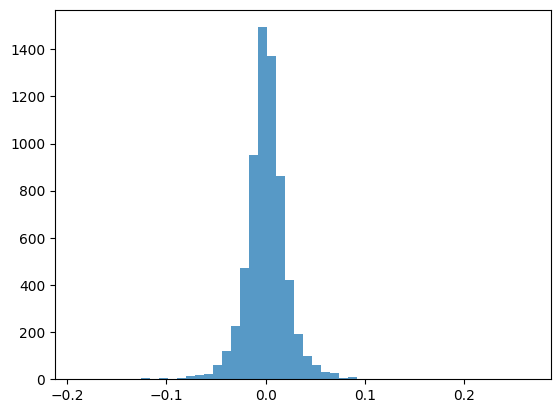

In [41]:
# Problem 4 - 2 points
# Given a stock symbol get the returns and calculate the .99 %-ile VaR on a $1MM investment
def VaRStock(symbol, confidence=.95, principal = 1,start="2020-01-01", end="2025-02-01"):

  # Get prices using functions defined above above
  returns = YahooData2returns(symbol,start,end)
  print(returns[1:5])


  # Feed returns into VaR function
  var=VaR(returns, confidence, principal)

  return(var)

var=VaRStock('GS', 0.975, 100, start="2019-01-01", end="2025-02-01")

print(var)

plt.hist(returns, bins=50, alpha=0.75)
plt.show()

In [ ]:
# Problem 5 - 2 points
# Given a stock symbol get the returns and calculate the .975 %-ile ES (expected shortfall) on a $1MM investment

# Get returns for stock using function above

# Calculate .975 %-ile and seleect returns

